In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes1/diabetesClean1.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import warnings
# Suppress FutureWarning messages
warnings.simplefilter(action='ignore', category=FutureWarning)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

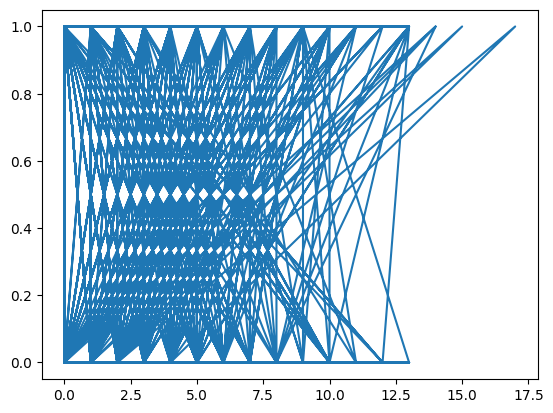

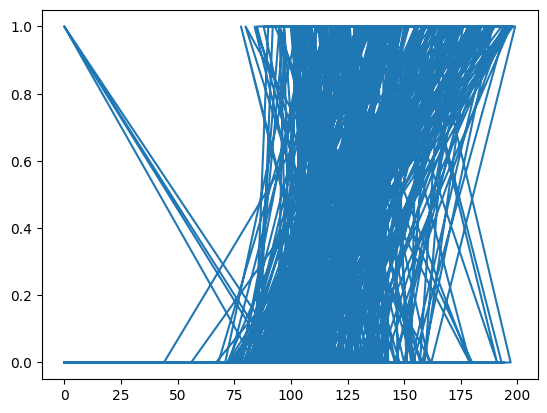

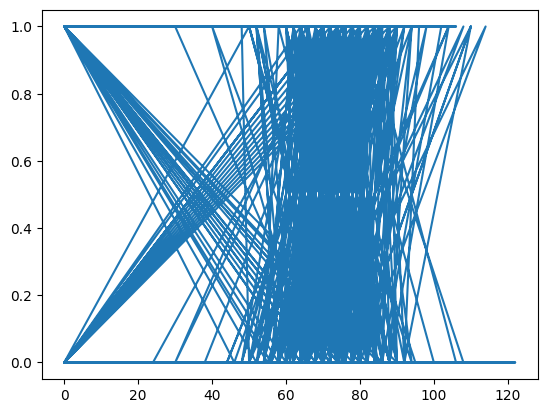

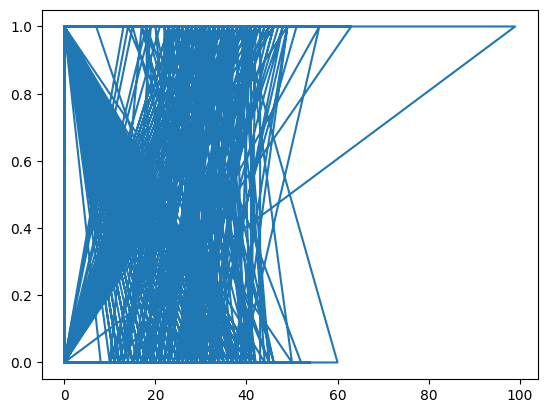

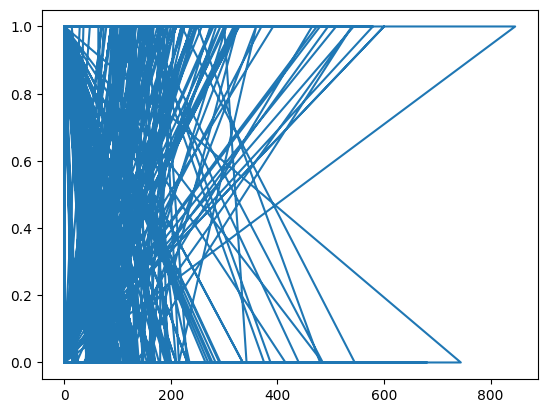

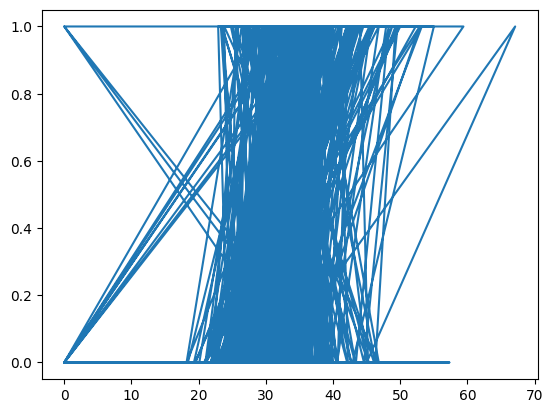

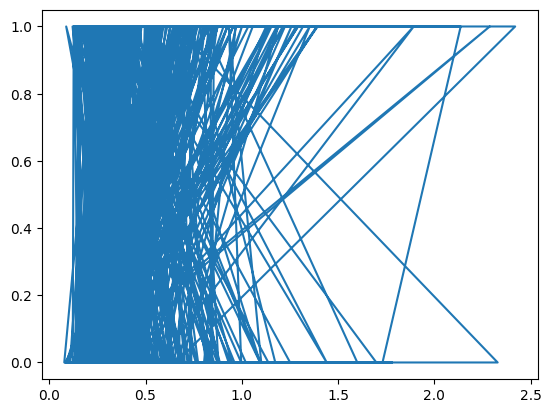

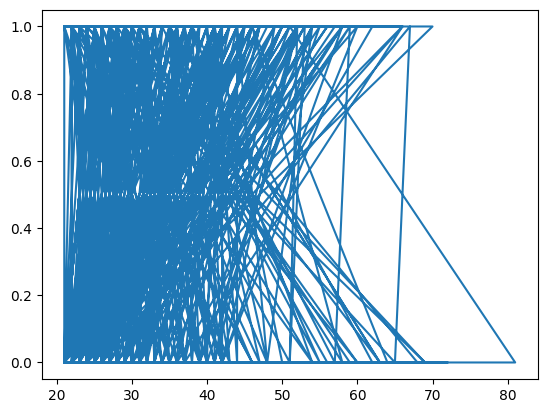

In [3]:
data = pd.read_csv('/kaggle/input/diabetes1/diabetesClean1.csv')
df1 = pd.DataFrame (data)
print (df1)
outcome = df1 ['Outcome']
df = df1.drop ( ['Outcome'], axis =1)
print ("--->", df.columns )
print (df)
for col in df.columns:
    plt.plot( df[col], outcome)
    plt.show()
    #print (df1[col])



*************************************************************************
01 Attempt
*************************************************************************
Original Training set has X--> 691 samples.
Original Testing set has  --> 77 samples.
Secondary Training set has X--> 614 samples.
Secondary  Testing set has  --> 77 samples.

 Data prepared, let's go  to analyse... 
------------------------------------------


 The original train number are: 
 345    0
362    0
342    0
390    0
39     1
      ..
474    0
7      0
761    1
505    0
212    0
Name: Outcome, Length: 77, dtype: int64
 The Test-Predicted accuracy is:  0.25800846787502074


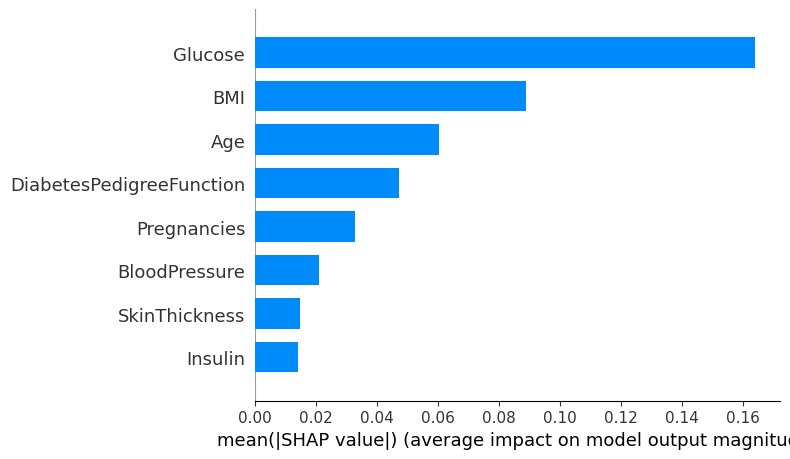

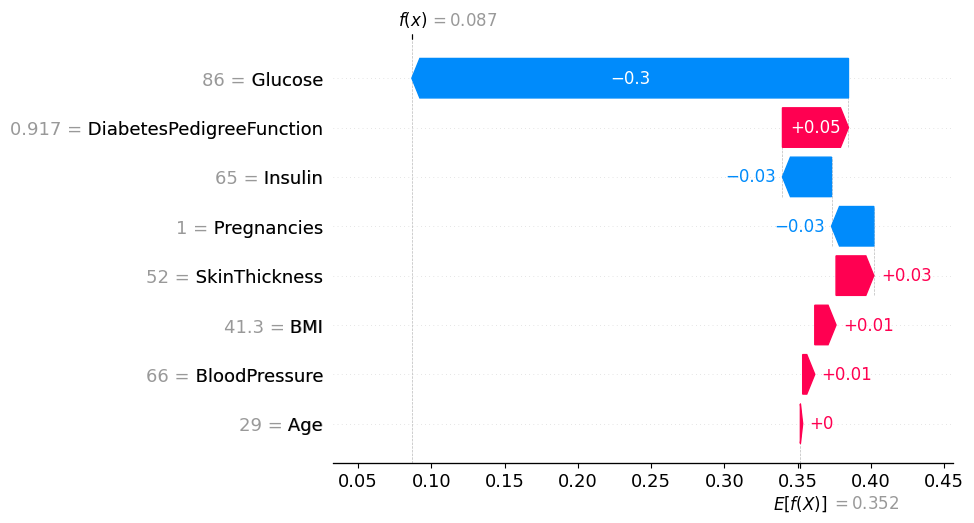



*************************************************************************
02 Attempt
*************************************************************************
Original Training set has X--> 691 samples.
Original Testing set has  --> 77 samples.
Secondary Training set has X--> 614 samples.
Secondary  Testing set has  --> 77 samples.

 Data prepared, let's go  to analyse... 
------------------------------------------


 The original train number are: 
 244    0
334    0
500    0
642    1
700    0
      ..
615    0
203    0
573    0
524    0
616    0
Name: Outcome, Length: 77, dtype: int64
 The Test-Predicted accuracy is:  0.38804945054945017


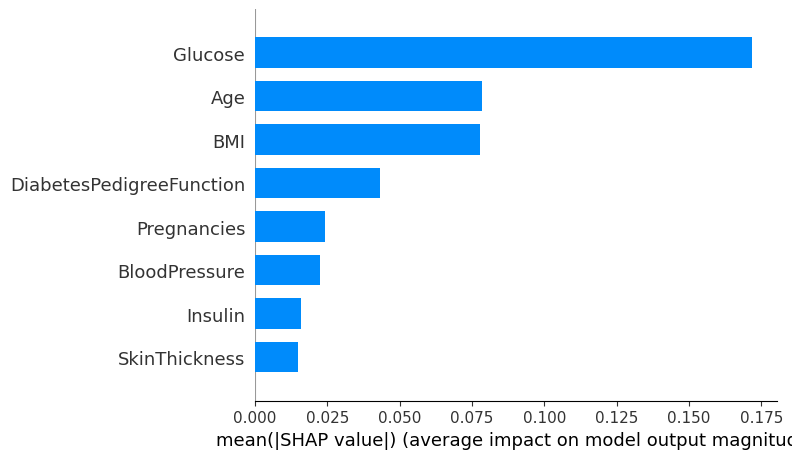

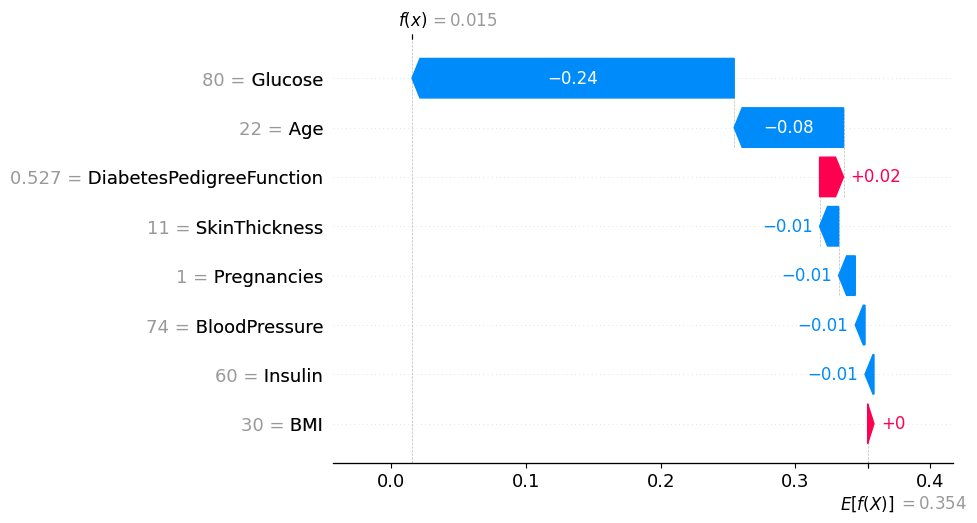



*************************************************************************
03 Attempt
*************************************************************************
Original Training set has X--> 691 samples.
Original Testing set has  --> 77 samples.
Secondary Training set has X--> 614 samples.
Secondary  Testing set has  --> 77 samples.

 Data prepared, let's go  to analyse... 
------------------------------------------


 The original train number are: 
 130    1
70     1
288    0
257    0
736    0
      ..
698    0
301    1
362    0
265    0
479    0
Name: Outcome, Length: 77, dtype: int64
 The Test-Predicted accuracy is:  0.19783175919177165


*************************************************************************
04 Attempt
*************************************************************************
Original Training set has X--> 691 samples.
Original Testing set has  --> 77 samples.
Secondary Training set has X--> 614 samples.
Secondary  Testing set has  --> 77 samples.

 Data prepare

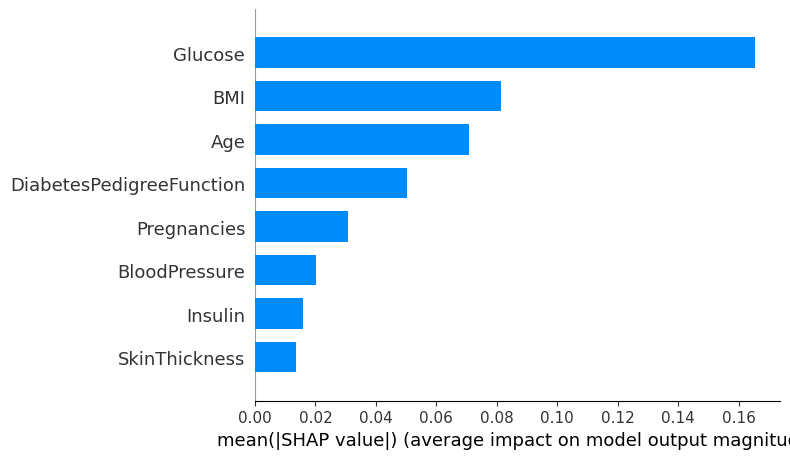

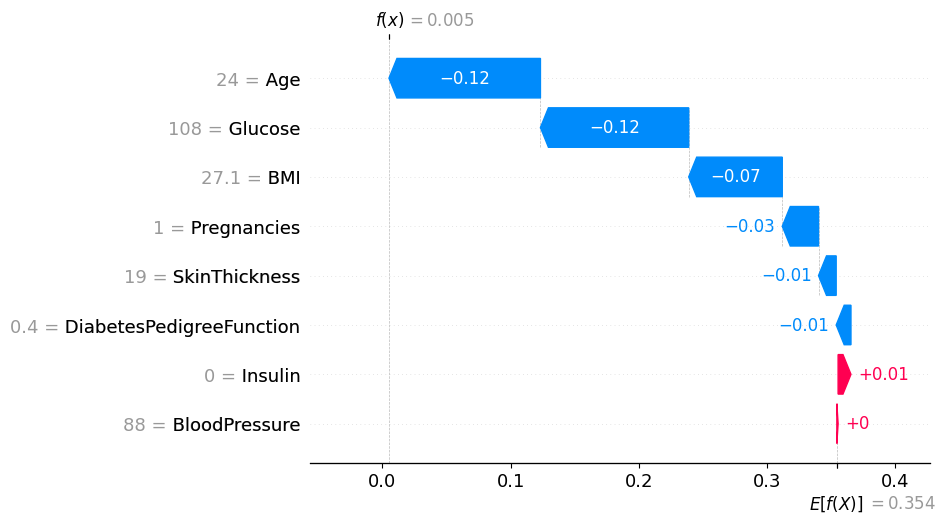



*************************************************************************
22 Attempt
*************************************************************************
Original Training set has X--> 691 samples.
Original Testing set has  --> 77 samples.
Secondary Training set has X--> 614 samples.
Secondary  Testing set has  --> 77 samples.

 Data prepared, let's go  to analyse... 
------------------------------------------


 The original train number are: 
 554    0
238    1
249    0
16     1
131    1
      ..
313    0
517    0
463    0
700    0
133    0
Name: Outcome, Length: 77, dtype: int64
 The Test-Predicted accuracy is:  0.5133829053599458


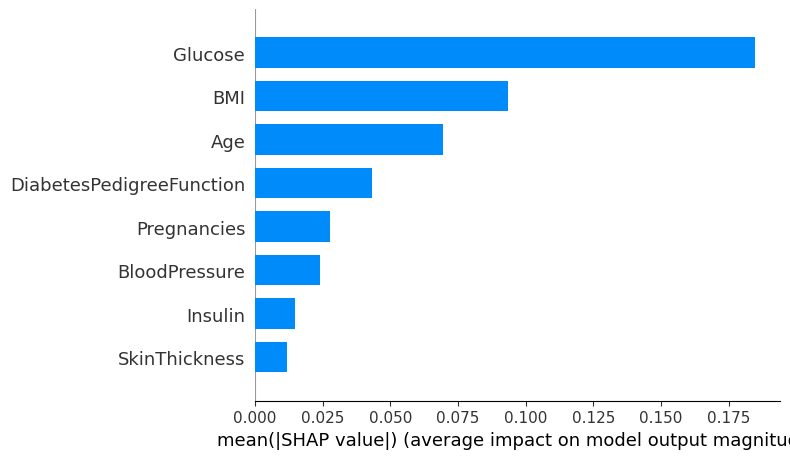

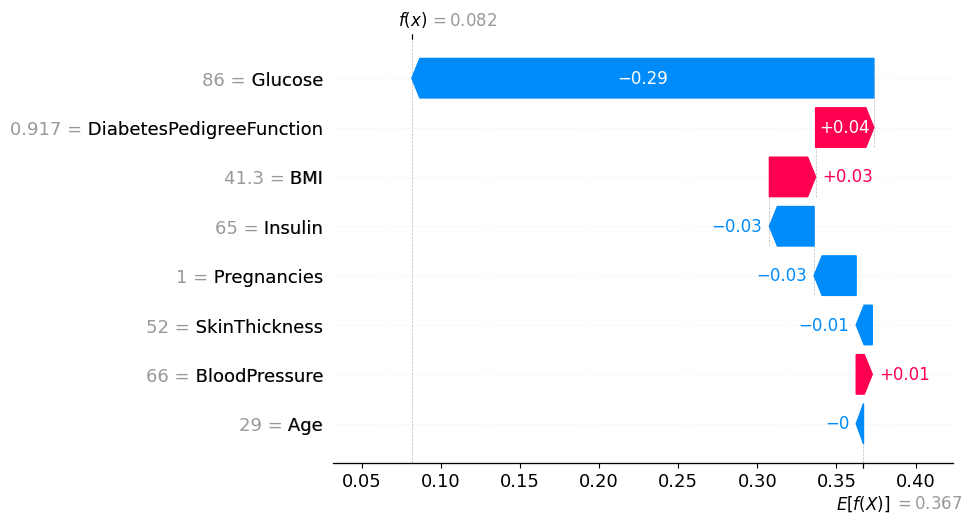



*************************************************************************
23 Attempt
*************************************************************************
Original Training set has X--> 691 samples.
Original Testing set has  --> 77 samples.
Secondary Training set has X--> 614 samples.
Secondary  Testing set has  --> 77 samples.

 Data prepared, let's go  to analyse... 
------------------------------------------


 The original train number are: 
 254    1
704    0
410    0
601    0
225    0
      ..
624    0
231    1
625    0
460    0
368    0
Name: Outcome, Length: 77, dtype: int64
 The Test-Predicted accuracy is:  0.46148877011121925


*************************************************************************
24 Attempt
*************************************************************************
Original Training set has X--> 691 samples.
Original Testing set has  --> 77 samples.
Secondary Training set has X--> 614 samples.
Secondary  Testing set has  --> 77 samples.

 Data prepare

In [4]:
from sklearn.ensemble import RandomForestRegressor
import shap

N=df.shape[0]
n_results = 7
i = 0
model = RandomForestRegressor(n_estimators=196, random_state=None) # 1000, None
rfsc =0
while i < 50:
    print("\n\n*************************************************************************")
    print (str(f"{i+1:02d}") + " Attempt\n*************************************************************************")
    X_traint, X_testt, y_traint, y_testt = train_test_split(df, outcome, test_size = 0.1, random_state = None)
    print("Original Training set has X--> {} samples.".format(X_traint.shape[0]))
    #print (X_train)
    print("Original Testing set has  --> {} samples.".format(X_testt.shape[0]))

    X_train, X_test, y_train, y_test = train_test_split(X_traint, y_traint, test_size = 0.11, random_state = None)
    print("Secondary Training set has X--> {} samples.".format(X_train.shape[0]))
    #print (X_train)
    print("Secondary  Testing set has  --> {} samples.".format(X_test.shape[0]))
    
    print ("\n Data prepared, let's go  to analyse... " )
    print ("------------------------------------------\n\n")

    y_test.columns =['Outcome']
    model.fit(X_train,y_train)
    
    # Use the trained model to predict the next 6 numbers for each set of features
    # Print the most likely set of numbers
   
    #print (" The original train number are: \n", y_test1)

    predictions = model.predict(X_test)
    # Get the most likely set of numbers based on the predictions
    #print (predictions)
    #rfScore = model.score(X_test, y_test)
    #print( " The Test-Predicted accuracy is: ", rfScore)
        
    print (" The original train number are: \n", y_testt)

    predictionst = model.predict(X_testt)
    # Get the most likely set of numbers based on the predictions
    #print (predictionst)

    
    rfScore = model.score(X_testt, y_testt)
    print( " The Test-Predicted accuracy is: ", rfScore)
    if rfScore >= rfsc :
    # Calculate Shap values
        explainer = shap.Explainer(model)
        shap_values = explainer(X_train)

        shap.summary_plot(shap_values, X_train, plot_type="bar")
        shap.plots.waterfall(shap_values[0])
        rfsc = rfScore
   
    i += 1